In [ ]:
`from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


TASK1
Create a new Google Collaborate notebook and load the dataset into a new Pandas data frame.
Print out the first few rows of the data frame.

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Data Files/Data Science Project Lifecycle/Tutorial 7/diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


TASK2
For people diagnosed with diabetes, what is their median blood pressure?

In [ ]:
median_bp = df[df['Outcome'] == 1]['BloodPressure'].median()
print(f"Median Blood Pressure for people with diabetes: {median_bp}")

Median Blood Pressure for people with diabetes: 74.0


TASK3
Identify the variable in the dataset that indicates whether a person was diagnosed with diabetes
following a test. Is the data set balanced?

In [ ]:
outcome_counts = df['Outcome'].value_counts()
print(outcome_counts)

Outcome
0    500
1    268
Name: count, dtype: int64


TASK4
Prepare your data for modelling by separating your dataset into two variables X and Y . X should
contain features of the dataset used to predict diabetes. Y should contain the target variable.

In [ ]:

# Separate features (X) and target variable (Y)
X = df.drop(columns=['Outcome'])  # Replace 'Outcome' with the actual target column name if different
Y = df['Outcome']

# Display the first few rows of X and Y
print("Features (X):")
print(X.head())
print("\nTarget Variable (Y):")
print(Y.head())


Features (X):
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  

Target Variable (Y):
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


Task 5 explanation

TASK6
Adapt and modify the code from TASK5 so that a train-test split of 3:1 is obtained.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (Y)
X = df.drop(columns=['Outcome'])  # Replace 'Outcome' with the actual target column name if different
Y = df['Outcome']

# Perform train-test split with a 3:1 ratio (75% train, 25% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

# Display the shapes of the resulting datasets
print("Training set shape:", X_train.shape, Y_train.shape)
print("Test set shape:", X_test.shape, Y_test.shape)


Training set shape: (576, 8) (576,)
Test set shape: (192, 8) (192,)


TASK7
Fit a DecisionTreeClassifier to your training dataset. Evaluate the performance of your trained
model using the accuracy score. Comment on the result.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Separate features (X) and target variable (Y)
X = df.drop(columns=['Outcome'])  # Replace 'Outcome' with the actual target column name if different
Y = df['Outcome']

# Perform train-test split with a 3:1 ratio (75% train, 25% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, Y_train)

# Predict on test set
Y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.7447916666666666


Task 8
Determine whether there is any evidence of model overfitting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np


# Separate features (X) and target variable (Y)
X = df.drop(columns=['Outcome'])  # Replace 'Outcome' with the actual target column name if different
Y = df['Outcome']

# Perform train-test split with a 3:1 ratio (75% train, 25% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, Y_train)

# Predict on test set
Y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Model Accuracy:", accuracy)

# Check for overfitting by comparing training and test accuracy
train_accuracy = accuracy_score(Y_train, clf.predict(X_train))
test_accuracy = accuracy

overfitting = train_accuracy - test_accuracy
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Overfitting Gap:", overfitting)


Model Accuracy: 0.7447916666666666
Training Accuracy: 1.0
Test Accuracy: 0.7447916666666666
Overfitting Gap: 0.25520833333333337


Task 09

Precision and recall are key performance metrics in classification models. Precision measures how many of the predicted positive cases are actually correct, helping assess the model’s accuracy in avoiding false positives. Recall, on the other hand, indicates how well the model identifies actual positive cases, showing its ability to minimize false negatives. In the classification report, the model has a precision of 0.71 and a recall of 0.50 for diabetic cases, meaning it correctly predicts diabetes 71% of the time but misses nearly half of actual cases. A balance between precision and recall is crucial, depending on whether false positives or false negatives are more critical for the application.

Task 10

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Train the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, Y_train)

# Make predictions
Y_pred = clf.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", cm)

# Extract values from the confusion matrix
TN, FP, FN, TP = cm.ravel()

# Calculate the False Positive Rate (FPR)
FPR = FP / (FP + TN)
print("\nFalse Positive Rate (FPR):", round(FPR, 2))

# Calculate Sensitivity (Recall)
Sensitivity = TP / (TP + FN)
print("Sensitivity (Recall):", round(Sensitivity, 2))

Confusion Matrix:
 [[106  19]
 [ 30  37]]

False Positive Rate (FPR): 0.15
Sensitivity (Recall): 0.55


Task 11

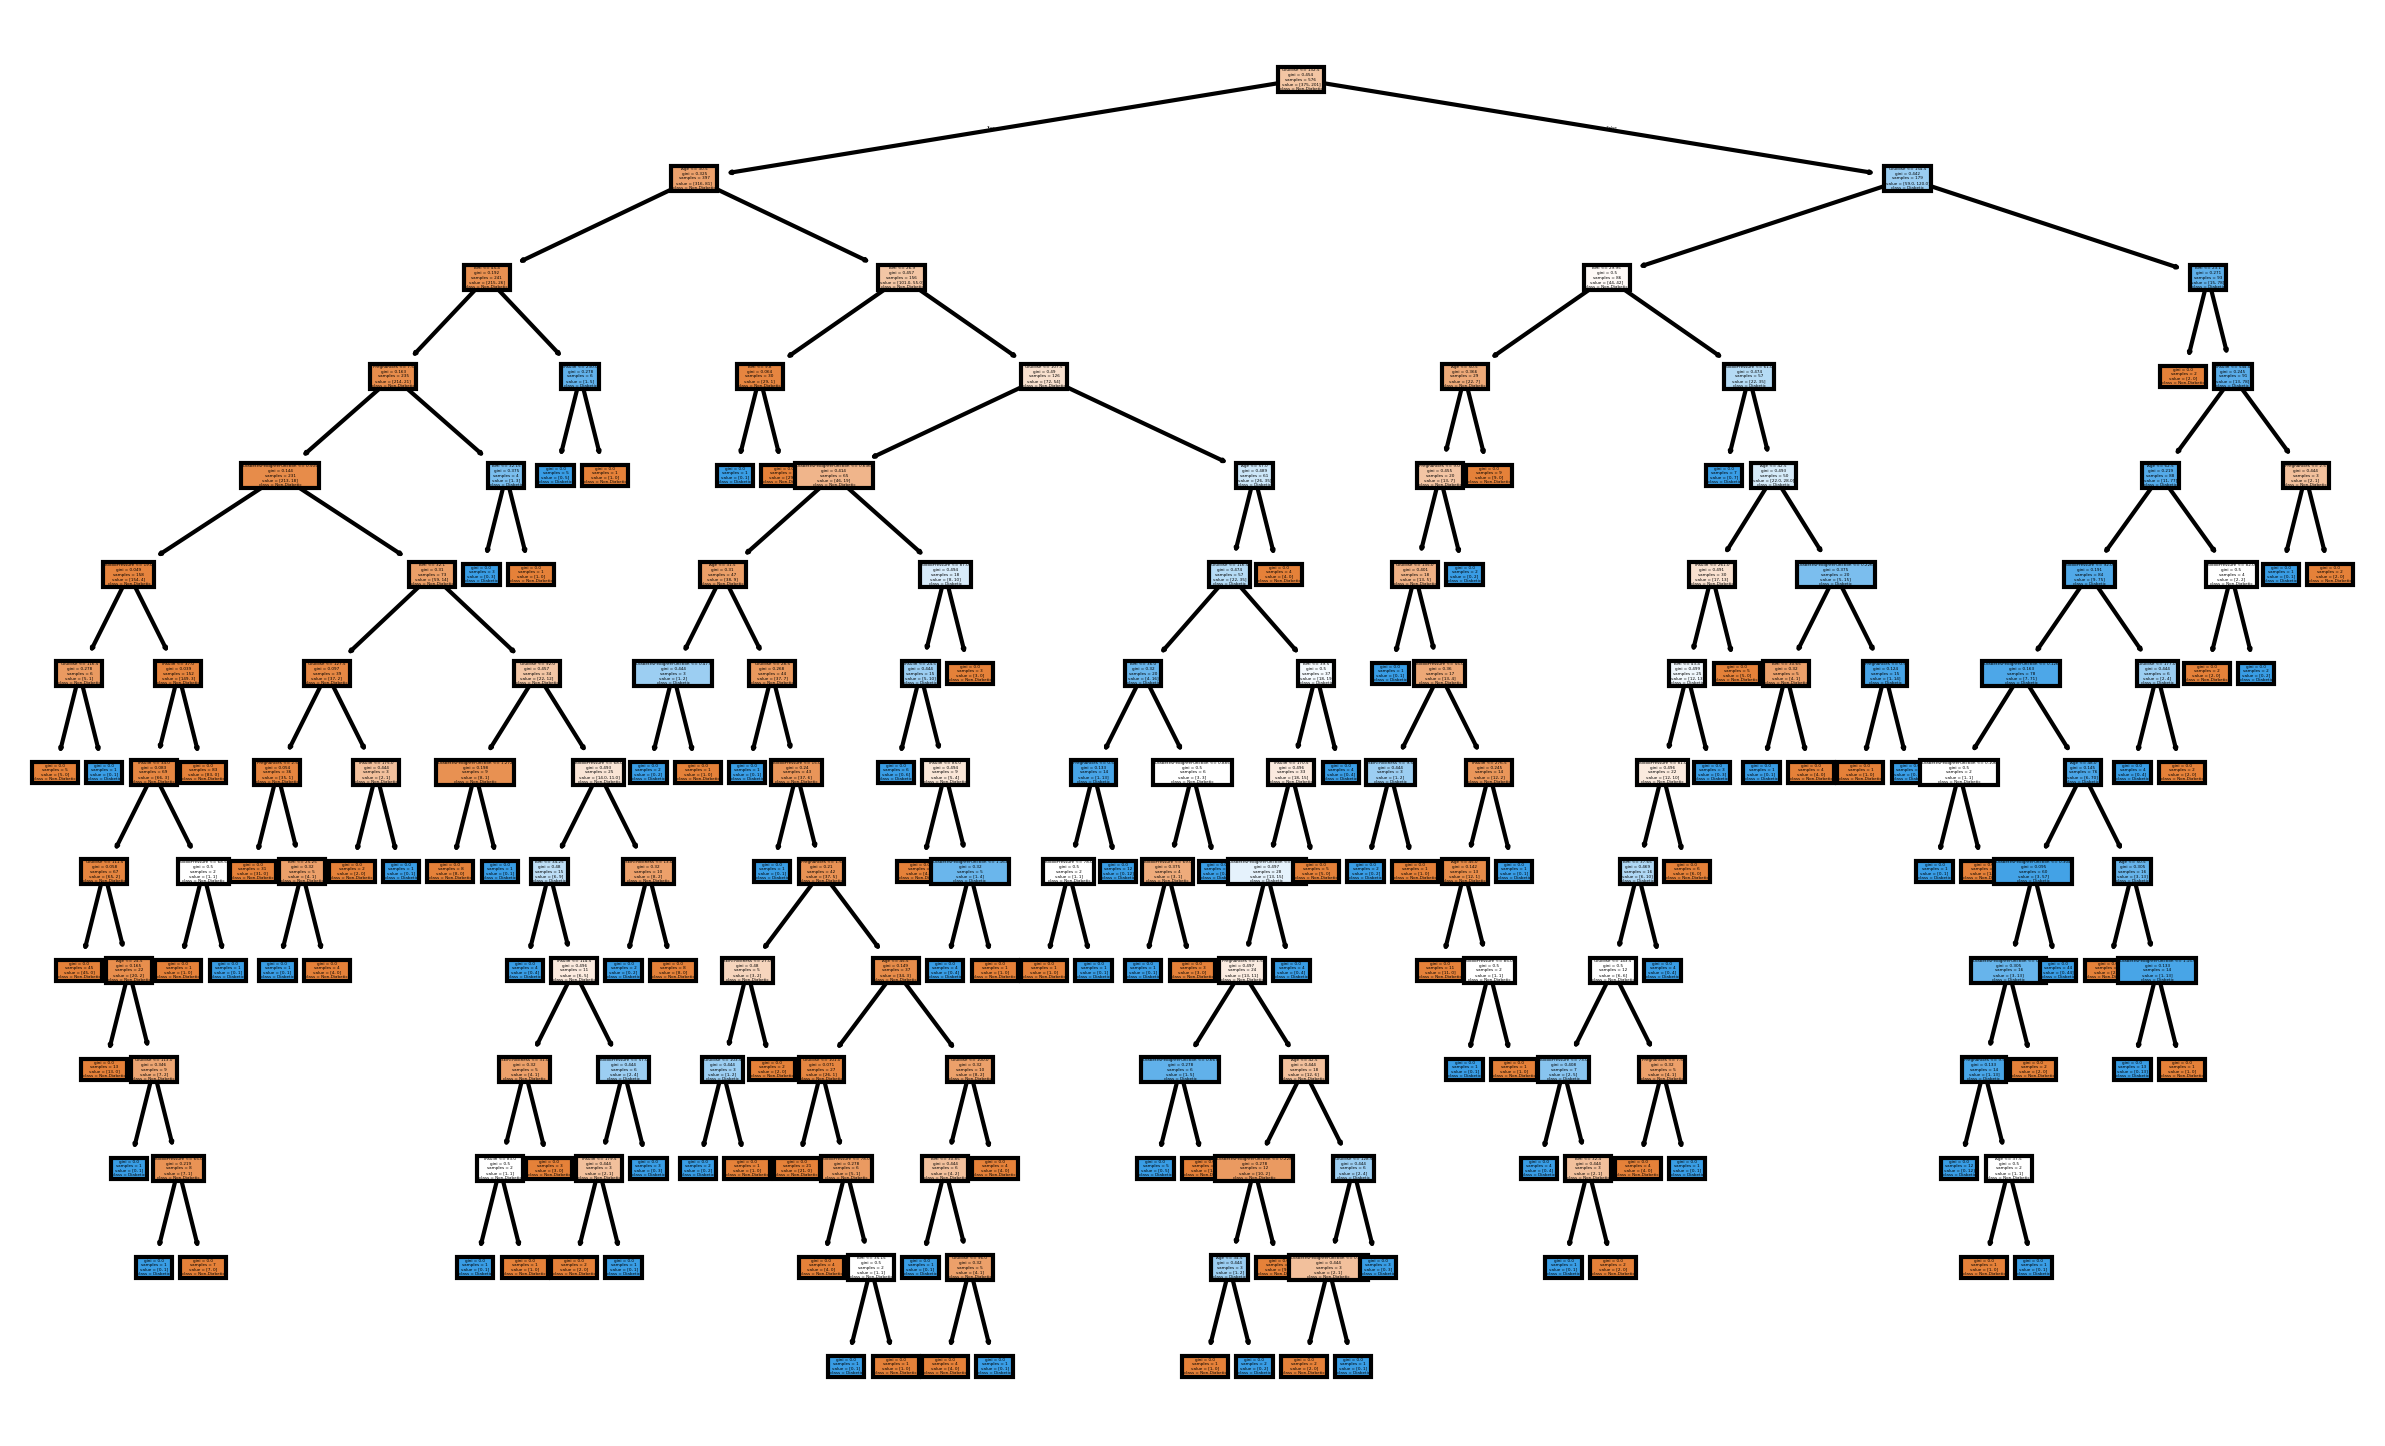

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

# Create the figure
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), dpi=300)

# Plot the trained Decision Tree
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Non-Diabetic", "Diabetic"])

# Display the plot
plt.show()

Task 12

Feature Importance Ranking:
 Glucose                     0.339264
BMI                         0.168434
DiabetesPedigreeFunction    0.117931
Age                         0.115767
BloodPressure               0.097375
Insulin                     0.078565
Pregnancies                 0.058974
SkinThickness               0.023690
dtype: float64


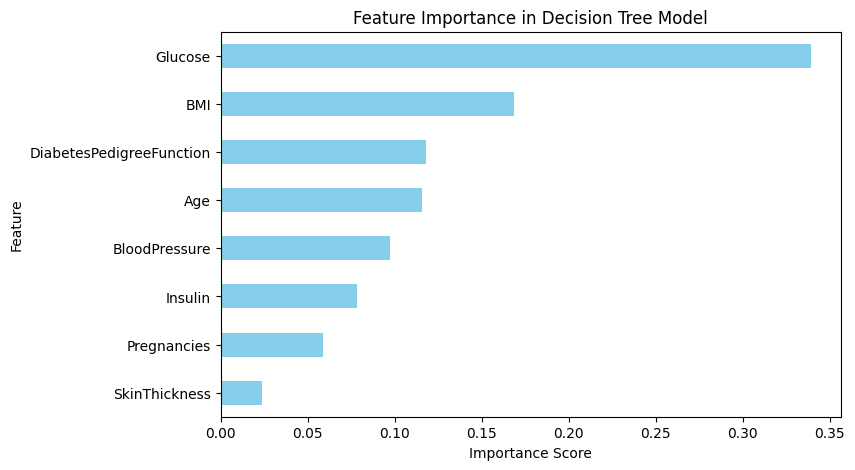

In [ ]:
import matplotlib.pyplot as plt

# Get feature importance scores and sort them
importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Print ranked features
print("Feature Importance Ranking:\n", importance)

# Plot feature importance
importance.plot(kind='barh', color='skyblue', figsize=(8, 5))
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Decision Tree Model")
plt.gca().invert_yaxis()  # Flip to show the most important feature on top
plt.show()

In [ ]:
# Identify and rank important features
feature_importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False) # Changed 'dt' to 'clf'
print(feature_importances)

Glucose                     0.339264
BMI                         0.168434
DiabetesPedigreeFunction    0.117931
Age                         0.115767
BloodPressure               0.097375
Insulin                     0.078565
Pregnancies                 0.058974
SkinThickness               0.023690
dtype: float64


Task 13

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # Import train_test_split

# Assuming X and Y are your features and target variable
# Perform train-test split with a 3:1 ratio (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y) # Create y_train and y_test



# Fit the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train) # Use y_train

# Evaluate the KNeighborsClassifier
y_pred_knn = knn.predict(X_test)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)  # Use y_test
report_knn = classification_report(y_test, y_pred_knn)  # Use y_test
print(conf_matrix_knn)
print(report_knn)

[[114  11]
 [ 41  26]]
              precision    recall  f1-score   support

           0       0.74      0.91      0.81       125
           1       0.70      0.39      0.50        67

    accuracy                           0.73       192
   macro avg       0.72      0.65      0.66       192
weighted avg       0.72      0.73      0.70       192



Task 14

In [ ]:
#task14

df_weather = pd.read_csv("/content/drive/MyDrive/Colab Data Files/Data Science Project Lifecycle/Tutorial 7/pm25_2016_2020.csv")
# Identify geographic features (Latitude & Longitude)
df_weather[["latitude_x", "longitude_x"]].head()

,latitude_x,longitude_x
0,39.024265,-95.711275
1,39.024265,-95.711275
2,39.024265,-95.711275
3,39.024265,-95.711275
4,39.024265,-95.711275


Task 15

In [ ]:
# Extract the two columns into a new data frame
X_weather = weather_df[columns_of_interest]

Task 16

In [ ]:
from sklearn.cluster import KMeans

# Fit K-Means with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Count observations per cluster
print(df['Cluster'].value_counts())

Cluster
1    384
2    177
4    137
0     52
3     18
Name: count, dtype: int64


Task 17

In [ ]:
from sklearn.cluster import KMeans

# Adapt the code for clustering into 5 groups
kmeans = KMeans(n_clusters=5)
weather_df['Cluster'] = kmeans.fit_predict(X_weather)

# Count observations in each cluster
cluster_counts = weather_df['Cluster'].value_counts()
print(cluster_counts)

Cluster
0    286
1    188
2    155
3    102
4     37
Name: count, dtype: int64
